In [81]:
import numpy as np
import matplotlib.pyplot as plt
from control_segmenter import ControlSegmenter
from manager import DataManager
from comparator import Indicator, Comparator
import tifffile

%load_ext autoreload
%autoreload 2

y_win = (6000, 7000)
x_win = (9000, 10000)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
origin_csv_fname = None
full_tiff = '/Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/02. Images/02.1. Raw prediction/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop/clusters/cluster0_from_1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned_mean_r10_cap1000.tif'
color_slice = '/Users/brianbrogan/Desktop/KI24/figures/test_slice.tiff'

image_fname = color_slice

## Variable Definition - start/stop - ensure range is divisible by step

# Distance Transform Percentile for Watershed Marker Definition
dtp = [80, 98]
dtp_step = 1

# Watershed Dilation Kernel Size
dks = [2, 7]
dks_step = 1

# Minimum Cell Area Count (pixels)
minca = [50, 200]
minca_step = 25

# Maximum Cell Area Count (pixels)
maxca = [850, 1000]
maxca_step = 25


watershed_var_ranges = {
    'dt_percentile': np.arange(dtp[0], dtp[1]+1, dtp_step),
    'dilation_kernel_size': np.arange(dks[0], dks[1]+1, dks_step, dtype=np.uint8),
    'minimum_cell_area': np.arange(minca[0], minca[1]+1, minca_step),
    'maximum_cell_area': np.arange(maxca[0], maxca[1]+1, maxca_step)
}

print("Origin Data File: ", origin_csv_fname)
print("Selected Image File: ", image_fname)
print("Number of params to be analyzed: ", len(watershed_var_ranges))


#tiff.imwrite('figures/MaskMaker_test1.tiff', masker.preproc, photometric='minisblack')
test_segmenter = ControlSegmenter(image_fname= image_fname,
                                    var_ranges= watershed_var_ranges,
                                    controls= [90,
                                                5,
                                                100,
                                                900],
                                    #area_filter_jobn=4,
                                    channel_id=1
                                    )
test_segmenter.export()
print(test_segmenter.var_seg_fulldf.info())
test_segmenter.var_seg_fulldf.head()

Origin Data File:  None
Selected Image File:  /Users/brianbrogan/Desktop/KI24/figures/test_slice.tiff
Number of params to be analyzed:  4
Collected Image from  /Users/brianbrogan/Desktop/KI24/figures/test_slice.tiff  with shape  (1000, 1000)
Variable Engine: creating segmentations for dt_percentile : 19 settings
controls: [90, 5, 100, 900]
var seg method: test_params: [array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,
       97, 98]), 5, 100, 900]
params testid: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98]
element: 80
Engine running... testing setting 80
Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 101.95it/s, 18/18]

10 CELLS FOUND
params testid: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98]
element: 81
Engine running... testing setting 81


Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 1436.79it/s, 18/18]

10 CELLS FOUND
params testid: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98]


element: 82
Engine running... testing setting 82
Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 946.72it/s, 18/18]

10 CELLS FOUND


params testid: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98]
element: 83
Engine running... testing setting 83
Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 1440.68it/s, 18/18]

10 CELLS FOUND
params testid: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98]
element: 84
Engine running... testing setting 84


Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 270.71it/s, 18/18] 

10 CELLS FOUND
params testid: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98]
element: 85
Engine running... testing setting 85


Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 1423.70it/s, 18/18]

10 CELLS FOUND
params testid: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98]
element: 86
Engine running... testing setting 86
Sifting contours...



Sifting: 100%|██████████| 18/18 [00:00<00:00, 1298.52it/s, 18/18]

10 CELLS FOUND
params testid: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98]
element: 87
Engine running... testing setting 87
Sifting contours...



Sifting: 100%|██████████| 18/18 [00:00<00:00, 1401.32it/s, 18/18]

10 CELLS FOUND
params testid: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98]
element: 88
Engine running... testing setting 88


Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 1470.48it/s, 18/18]

10 CELLS FOUND


params testid: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98]
element: 89
Engine running... testing setting 89
Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 1396.86it/s, 18/18]

10 CELLS FOUND


params testid: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98]
element: 90
Engine running... testing setting 90
Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 1436.10it/s, 18/18]

10 CELLS FOUND


params testid: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98]
element: 91
Engine running... testing setting 91
Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 1352.35it/s, 18/18]

10 CELLS FOUND


params testid: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98]
element: 92
Engine running... testing setting 92
Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 1517.93it/s, 18/18]

10 CELLS FOUND
params testid: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98]
element: 93
Engine running... testing setting 93


Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 1264.93it/s, 18/18]

10 CELLS FOUND


params testid: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98]
element: 94
Engine running... testing setting 94
Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 1241.80it/s, 18/18]

10 CELLS FOUND


params testid: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98]
element: 95
Engine running... testing setting 95
Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 1132.51it/s, 18/18]

10 CELLS FOUND
params testid: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98]
element: 96
Engine running... testing setting 96
Sifting contours...



Sifting: 100%|██████████| 18/18 [00:00<00:00, 937.22it/s, 18/18] 

10 CELLS FOUND
params testid: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98]
element: 97
Engine running... testing setting 97
Sifting contours...



Sifting: 100%|██████████| 18/18 [00:00<00:00, 225.17it/s, 18/18]

10 CELLS FOUND
params testid: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98]
element: 98
Engine running... testing setting 98


Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 1416.09it/s, 18/18]

10 CELLS FOUND
Variable Engine: creating segmentations for dilation_kernel_size : 6 settings
controls: [90, 5, 100, 900]
var seg method: test_params: [90, array([2, 3, 4, 5, 6, 7], dtype=uint8), 100, 900]
params testid: [2 3 4 5 6 7]
element: 2
Engine running... testing setting 2


Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 1549.17it/s, 18/18]

10 CELLS FOUND
params testid: [2 3 4 5 6 7]
element: 3
Engine running... testing setting 3


Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 796.61it/s, 18/18]

10 CELLS FOUND
params testid: [2 3 4 5 6 7]
element: 4
Engine running... testing setting 4


Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 260.53it/s, 18/18]

10 CELLS FOUND
params testid: [2 3 4 5 6 7]
element: 5
Engine running... testing setting 5


Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 1131.30it/s, 18/18]

10 CELLS FOUND
params testid: [2 3 4 5 6 7]
element: 6
Engine running... testing setting 6


Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 1623.81it/s, 18/18]

10 CELLS FOUND
params testid: [2 3 4 5 6 7]
element: 7
Engine running... testing setting 7


Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 985.66it/s, 18/18]

10 CELLS FOUND
Variable Engine: creating segmentations for minimum_cell_area : 7 settings
controls: [90, 5, 100, 900]
var seg method: test_params: [90, 5, array([ 50,  75, 100, 125, 150, 175, 200]), 900]
params testid: [ 50  75 100 125 150 175 200]
element: 50
Engine running... testing setting 50


Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 1537.00it/s, 18/18]

10 CELLS FOUND
params testid: [ 50  75 100 125 150 175 200]
element: 75
Engine running... testing setting 75
Sifting contours...



Sifting: 100%|██████████| 18/18 [00:00<00:00, 1413.86it/s, 18/18]

10 CELLS FOUND
params testid: [ 50  75 100 125 150 175 200]
element: 100
Engine running... testing setting 100


Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 1237.81it/s, 18/18]

10 CELLS FOUND
params testid: [ 50  75 100 125 150 175 200]
element: 125
Engine running... testing setting 125
Sifting contours...



Sifting: 100%|██████████| 18/18 [00:00<00:00, 274.68it/s, 18/18]

10 CELLS FOUND
params testid: [ 50  75 100 125 150 175 200]
element: 150
Engine running... testing setting 150


Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 1438.07it/s, 18/18]

10 CELLS FOUND
params testid: [ 50  75 100 125 150 175 200]
element: 175
Engine running... testing setting 175
Sifting contours...



Sifting: 100%|██████████| 18/18 [00:00<00:00, 1336.81it/s, 18/18]

9 CELLS FOUND


params testid: [ 50  75 100 125 150 175 200]
element: 200
Engine running... testing setting 200
Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 1490.42it/s, 18/18]

9 CELLS FOUND
Variable Engine: creating segmentations for maximum_cell_area : 7 settings
controls: [90, 5, 100, 900]
var seg method: test_params: [90, 5, 100, array([ 850,  875,  900,  925,  950,  975, 1000])]
params testid: [ 850  875  900  925  950  975 1000]


element: 850
Engine running... testing setting 850
Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 258.66it/s, 18/18] 

9 CELLS FOUND


params testid: [ 850  875  900  925  950  975 1000]
element: 875
Engine running... testing setting 875
Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 1477.59it/s, 18/18]

9 CELLS FOUND
params testid: [ 850  875  900  925  950  975 1000]
element: 900
Engine running... testing setting 900
Sifting contours...



Sifting: 100%|██████████| 18/18 [00:00<00:00, 1363.02it/s, 18/18]

10 CELLS FOUND
params testid: [ 850  875  900  925  950  975 1000]
element: 925
Engine running... testing setting 925
Sifting contours...



Sifting: 100%|██████████| 18/18 [00:00<00:00, 1546.38it/s, 18/18]

10 CELLS FOUND
params testid: [ 850  875  900  925  950  975 1000]
element: 950
Engine running... testing setting 950


Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 1536.91it/s, 18/18]

10 CELLS FOUND


params testid: [ 850  875  900  925  950  975 1000]
element: 975
Engine running... testing setting 975
Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 1462.93it/s, 18/18]

11 CELLS FOUND


params testid: [ 850  875  900  925  950  975 1000]
element: 1000
Engine running... testing setting 1000
Sifting contours...


Sifting: 100%|██████████| 18/18 [00:00<00:00, 1438.38it/s, 18/18]

11 CELLS FOUND


Creating exports...
Done.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   test_paramID          39 non-null     object
 1   num_cells             39 non-null     int64 
 2   dt_percentile         39 non-null     int64 
 3   dilation_kernel_size  39 non-null     int64 
 4   minimum_cell_area     39 non-null     int64 
 5   maximum_cell_area     39 non-null     int64 
 6   markers               39 non-null     object
 7   contours              39 non-null     object
dtypes: int64(5), object(3)
memory usage: 2.6+ KB
None


,test_paramID,num_cells,dt_percentile,dilation_kernel_size,minimum_cell_area,maximum_cell_area,markers,contours
0,dt_percentile0,10,80,5,100,900,"[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, ...","[[[[986, 28]], [[985, 29]], [[984, 29]], [[983..."
1,dt_percentile1,10,81,5,100,900,"[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, ...","[[[[986, 28]], [[985, 29]], [[984, 29]], [[983..."
2,dt_percentile2,10,82,5,100,900,"[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, ...","[[[[986, 28]], [[985, 29]], [[984, 29]], [[983..."
3,dt_percentile3,10,83,5,100,900,"[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, ...","[[[[986, 28]], [[985, 29]], [[984, 29]], [[983..."
4,dt_percentile4,10,84,5,100,900,"[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, ...","[[[[986, 28]], [[985, 29]], [[984, 29]], [[983..."


In [95]:
marker_check = np.array(test_segmenter.var_seg_fulldf.loc[1, 'markers'])
print(marker_check.shape)

(1000, 1000)


In [96]:
manager = DataManager(
    origin_csv_fname='/Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/input/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop.csv',
    annotation_fname='/Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/01. Co-expression network/1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned/Cluster_annotation.csv'
)

In [97]:
manager.markers[1].shape

(1000, 1000)

In [98]:
indicatorTester = Indicator(
    origin_csv = manager.origin_csv,
    annotation = manager.annotation,
    n_neg=5
    )
indicatorTester.indicators.head()

Finding positive indicators:   0%|          | 0/3 [00:00<?, ?step/s]

Finding negative indicators: 100%|██████████| 4/4 [00:00<00:00,  5.82cluster/s]


,geneID,count,cluster,type
0,MT-RNR2,182774,0,pos
1,MT-CO2,42167,0,pos
2,MT-TV,39477,0,pos
3,MT-CO3,39279,0,pos
4,MT-ND1,34312,0,pos


In [99]:
comparatorTester = Comparator(
    indicator = indicatorTester,
    metadata = manager.metadata,
    markers = manager.markers,
    contours = manager.contours
)

In [107]:
#neg_indic_mask = comparatorTester.create_indicator_mask(xrange = x_win, 
#                                                        yrange = y_win,
#                                                        indicators = indicatorTester.create_indicator_dict(indicatorTester.negative_indicators))
indic_mask = comparatorTester.create_indicator_mask(xrange = x_win,
                                                    yrange = y_win,
                                                    indicators = indicatorTester.create_indicator_dict(indicatorTester.indicators))
print(np.unique(indic_mask))
print(indic_mask.shape)

IndexError: index 1000 is out of bounds for axis 0 with size 1000

In [101]:
print(len(indicatorTester.negative_indicators))

20


In [102]:
rgb = comparatorTester.rgb_indicator_mask(indic_mask)


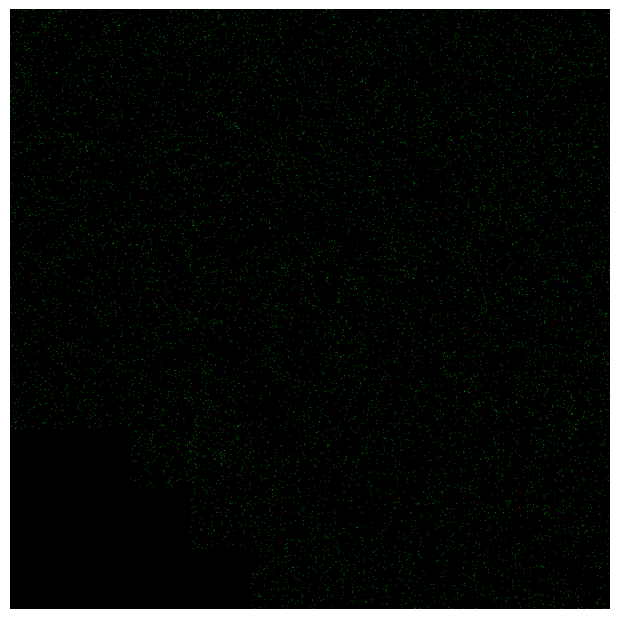

In [103]:
plt.figure(figsize=(6, 6), dpi=100)
plt.imshow(rgb)
plt.axis('off')  # Remove axes

# Save the plot to a TIFF file
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Remove borders
plt.savefig('/Users/brianbrogan/Desktop/KI24/figures/rgb_indicator_test1.tiff', dpi=100, format='tiff', bbox_inches='tight', pad_inches=0)

# Optionally display the image
plt.show()

In [104]:
tot, tp, fn = comparatorTester.count_marker_and_indicators(indic_mask, 
                                                           comparatorTester.markers[10],
                                                           target=5)
print("total pixels under target: ", tot)
print("true positive count: ", tp)
print("false negative count: ", fn)

(1001, 1001)
(1000, 1000)
total count:  323


IndexError: boolean index did not match indexed array along dimension 0; dimension is 1001 but corresponding boolean dimension is 1000